In [ ]:
# notebook for generating correlated multiuniforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example creating correlated multivariate normal


$X$ and $Y$ are two random variables with mean $\mu_X$ and $\mu_Y$

In [2]:
mu_x = 0
mu_y = 0
var_x = 1.0
var_y = 1.0

cov_xy = 0.75

mean_vector = np.array([mu_x, mu_y])
cov_matrix = np.matrix([[var_x, cov_xy], [cov_xy, var_y]])

# generate 1000 samples of X and Y
np.random.seed(400)
randoms = np.random.multivariate_normal(mean_vector, cov_matrix, size=1000)

Text(0.5, 1.0, 'Covariance: 0.75')

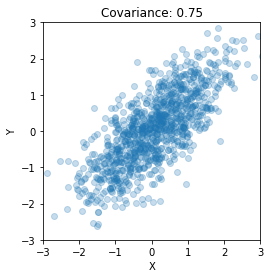

In [3]:
# plot the results:
plt.scatter(randoms[:,0], randoms[:,1], alpha=0.25)
ax = plt.gca()
plt.xlim([-3.0, 3.0])
plt.ylim([-3.0, 3.0])
ax.set_aspect('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Covariance: {cov_xy}')

In [4]:
# map the normal variables to uniform


In [12]:
# uniforms
N = 1000
# unis = np.random.uniform(size=10000)
# unis = np.random.standard_normal(size=10000)
unis = np.random.multivariate_normal(mean=np.zeros(N), cov=np.eye(N))
# unis = np.random.triangular(left=-1.0, mode=0, right= 1.0, size=10000)
# plt.hist(unis)

    

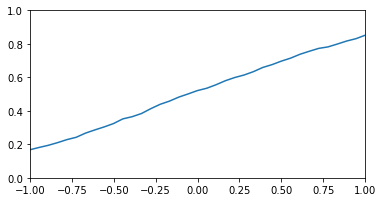

In [13]:
cdf = np.zeros(101)
x = np.linspace(np.min(unis), np.max(unis), len(cdf))
for i in range(0, len(cdf)):
    # count the number less than or equal to
    count = 0
    for j in range(0, len(unis)):
        if unis[j] <= x[i]:
            count = count + 1
    cdf[i] = count / len(unis)
plt.plot(x, cdf)
plt.xlim([-1, 1])
plt.ylim([0, 1])
ax = plt.gca()
ax.set_aspect('equal')

In [40]:
def normal_to_uniform(y):
    # cdf is already defined
    # find the closest value to the input
    distance = np.abs(x - y)
    closest_index = np.argmin(distance)
    return cdf[closest_index]

In [15]:
reconstructed_uniform = np.zeros(len(unis))
for i in range(0, len(unis)):
    reconstructed_uniform[i] = normal_to_uniform(unis[i])
    

(array([101., 101.,  94., 103.,  89., 122.,  97., 101.,  97.,  95.]),
 array([0.001 , 0.1009, 0.2008, 0.3007, 0.4006, 0.5005, 0.6004, 0.7003,
        0.8002, 0.9001, 1.    ]),
 <BarContainer object of 10 artists>)

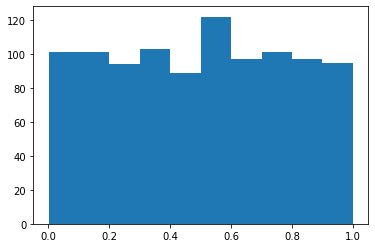

In [16]:
plt.hist(reconstructed_uniform)

(array([  5.,  28., 113., 158., 217., 194., 159.,  85.,  33.,   8.]),
 array([-2.78629446e+00, -2.22923898e+00, -1.67218351e+00, -1.11512803e+00,
        -5.58072557e-01, -1.01708256e-03,  5.56038392e-01,  1.11309387e+00,
         1.67014934e+00,  2.22720482e+00,  2.78426029e+00]),
 <BarContainer object of 10 artists>)

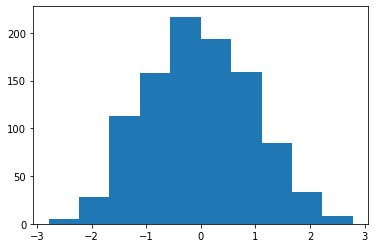

In [17]:
plt.hist(unis)

In [11]:
normal_to_uniform(-.75)

0.5

In [18]:
import pickle

In [19]:
covariance_file = '/work/westgroup/harris.se/autoscience/autoscience/uncertainty/butane_covariance.pickle'
with open(covariance_file, 'rb') as handle:
    Sigma_k = pickle.load(handle)


In [33]:
len(Sigma_k)

1822

In [66]:
# Sigma_k[324, 328]
len(Sigma_k)
normal_randoms = np.random.multivariate_normal(np.zeros(len(Sigma_k)), Sigma_k, size=1000)

/work/westgroup/harris.se/tst_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
normal_randoms.shape

(1000, 1822)

In [68]:
# compute the CDF

In [80]:
sorted_normals = np.sort(normal_randoms, axis=0)
xs = np.zeros(sorted_normals.shape)
for rxn_index in range(0, sorted_normals.shape[1]):
    # the variance represents the 1/12*(b-a)^2
    # the variance represents the a^2/3
    var = Sigma_k[rxn_index, rxn_index]
    a = np.sqrt(3 * var)
    xs[:, rxn_index] = np.linspace(-a, a, sorted_normals.shape[0])


In [87]:
def normal_to_uniform(sample, rxn_index):
    # cdf is already defined
    # find the closest value to the input
    distance = np.abs(sorted_normals[:, rxn_index] - sample)
    closest_index = np.argmin(distance)
    return xs[closest_index, rxn_index]

In [95]:
# convert all those normal variables to uniforms
uniform_randoms = np.zeros(normal_randoms.shape)
for i in range(0, normal_randoms.shape[0]):
    for j in range(0, normal_randoms.shape[1]):
        uniform_randoms[i, j] = normal_to_uniform(normal_randoms[i, j], j)


In [104]:
np.corrcoef(uniform_randoms[:, 324], uniform_randoms[:, 325])

array([[1.        , 0.48380306],
       [0.48380306, 1.        ]])

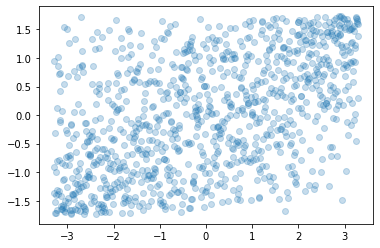

In [105]:
plt.scatter(uniform_randoms[:, 324], uniform_randoms[:, 325], alpha=0.25)

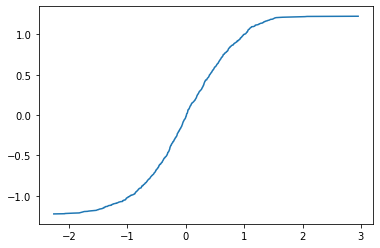

In [92]:
plt.plot(sorted_normals[:, 0], xs[:, 0])

In [82]:
Sigma_k[324,324]

3.617445218103562

In [84]:
i = 0
var = Sigma_k[i, i]
a = np.sqrt(3 * var)
print(a)

1.224744871391589


In [78]:
a = 0.4

print('var = ', 1/12 * (2*a))
1.0/np.sqrt(48*3.617445218103562)

0.07588892481307492

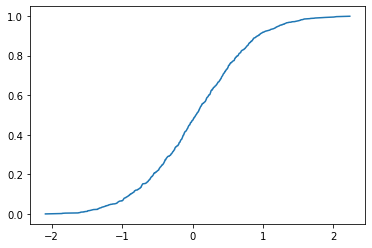

In [64]:
# compute the cdf

single_normal = normal_randoms[:,0]

single_sorted = np.sort(single_normal)

one_weight = 1.0 / len(single_sorted)

xs = np.arange(0, 1.0, one_weight)

# plt.plot(xs, single_sorted)
plt.plot(single_sorted, xs)

In [59]:
single_sorted

array([-2.08875415e+00, -1.94002448e+00, -1.85064584e+00, -1.84869337e+00,
       -1.80594129e+00, -1.62471106e+00, -1.61556442e+00, -1.59633563e+00,
       -1.58952919e+00, -1.58471239e+00, -1.54105742e+00, -1.53970957e+00,
       -1.52174506e+00, -1.49319272e+00, -1.49030372e+00, -1.48665016e+00,
       -1.48662165e+00, -1.46052222e+00, -1.44961151e+00, -1.43378227e+00,
       -1.42340610e+00, -1.41575021e+00, -1.40571611e+00, -1.35042237e+00,
       -1.34918064e+00, -1.34274913e+00, -1.34039119e+00, -1.33027026e+00,
       -1.32893793e+00, -1.32119450e+00, -1.31570547e+00, -1.29998910e+00,
       -1.29620005e+00, -1.29324280e+00, -1.28643609e+00, -1.27120050e+00,
       -1.26280619e+00, -1.25431857e+00, -1.24509250e+00, -1.23988731e+00,
       -1.23011781e+00, -1.22936798e+00, -1.20943808e+00, -1.19907195e+00,
       -1.19604788e+00, -1.19458340e+00, -1.18170902e+00, -1.17240831e+00,
       -1.16803713e+00, -1.14138469e+00, -1.13690326e+00, -1.10423521e+00,
       -1.09377163e+00, -

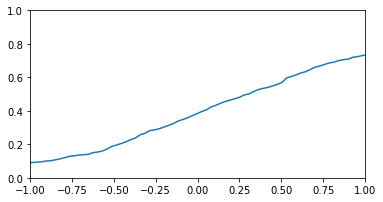

In [56]:
cdf = np.zeros(11)
x_values = np.zeros((normal_randoms.shape[1], len(cdf)))
for k in range(0, normal_randoms.shape[1]):  # count through each reaction
    x_values[k, :] = np.linspace(np.min(normal_randoms[:, k]), np.max(normal_randoms[:, k]), len(cdf))
    for i in range(0, len(cdf)):
        # count the number less than or equal to
        count = 0
        for j in range(0, len(normal_randoms[:, k])):
            if normal_randoms[j, j] <= x_values[j,i]:
                count = count + 1
        cdf[i] = count / len(normal_randoms[:, k])
    plt.plot(x, cdf)
    plt.xlim([-1, 1])
    plt.ylim([0, 1])
    ax = plt.gca()
    ax.set_aspect('equal')

In [41]:
reconstructed_uniform = np.zeros(normal_randoms.shape)
for i in range(0, normal_randoms.shape[0]):
    for j in range(0, normal_randoms.shape[1]):
        reconstructed_uniform[i, j] = normal_to_uniform(normal_randoms[i, j])

In [ ]:
reconstructed_uniform[:]

In [51]:
reconstructed_uniform[:, 324]

array([0.108, 0.718, 0.868, 0.015, 0.924, 0.023, 0.515, 0.986, 0.045,
       0.   , 0.022, 0.905, 0.743, 0.089, 0.008, 0.333, 0.826, 0.093,
       0.333, 0.551, 0.924, 0.848, 0.478, 0.019, 0.903, 0.944, 0.712,
       0.938, 0.463, 0.008, 0.398, 0.876, 0.891, 0.888, 0.009, 0.661,
       0.342, 0.413, 0.977, 0.8  , 0.908, 0.223, 0.688, 0.737, 0.098,
       0.01 , 0.8  , 0.967, 0.089, 0.942, 0.434, 0.023, 0.001, 0.634,
       0.094, 0.903, 0.661, 0.807, 0.088, 0.279, 0.009, 0.881, 0.025,
       0.031, 0.908, 0.047, 0.954, 0.463, 0.718, 0.959, 0.324, 0.938,
       0.047, 0.463, 0.945, 0.014, 0.008, 0.324, 0.15 , 0.498, 0.929,
       0.765, 0.01 , 0.781, 0.929, 0.967, 0.383, 0.257, 0.008, 0.986,
       0.551, 0.445, 0.023, 0.008, 0.612, 0.968, 0.153, 0.031, 0.445,
       0.54 , 0.023, 0.01 , 0.753, 0.698, 0.618, 0.491, 0.058, 0.453,
       0.342, 0.949, 0.902, 0.434, 0.694, 0.507, 0.781, 0.498, 0.279,
       0.453, 0.383, 0.126, 0.104, 0.832, 0.876, 0.74 , 0.137, 0.753,
       0.967, 0.   ,

(array([312.,  74.,  51.,  54.,  45.,  57.,  55.,  94.,  79., 179.]),
 array([0.    , 0.0996, 0.1992, 0.2988, 0.3984, 0.498 , 0.5976, 0.6972,
        0.7968, 0.8964, 0.996 ]),
 <BarContainer object of 10 artists>)

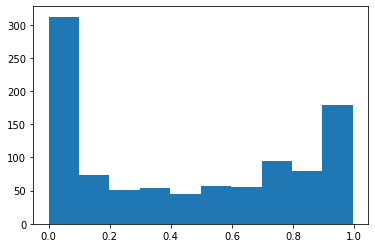

In [50]:
plt.hist(reconstructed_uniform[:,324])

In [31]:
randoms2[0]

array([-0.56916907,  0.44983538])

In [53]:
Sigma_k[324,324]

3.617445218103562

(array([  7.,  23.,  78., 148., 244., 246., 158.,  74.,  14.,   8.]),
 array([-6.08747226, -4.85199285, -3.61651344, -2.38103403, -1.14555462,
         0.08992479,  1.3254042 ,  2.56088361,  3.79636302,  5.03184243,
         6.26732184]),
 <BarContainer object of 10 artists>)

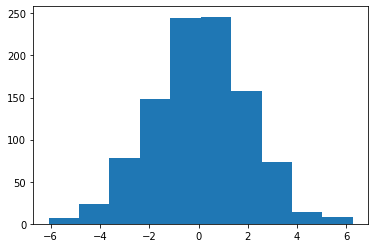

In [52]:
plt.hist(normal_randoms[:,324])

In [54]:
Sigma_k[0,0]

0.5

(array([  5.,  37.,  79., 167., 224., 230., 162.,  65.,  22.,   9.]),
 array([-2.08875415, -1.65673485, -1.22471555, -0.79269626, -0.36067696,
         0.07134233,  0.50336163,  0.93538092,  1.36740022,  1.79941952,
         2.23143881]),
 <BarContainer object of 10 artists>)

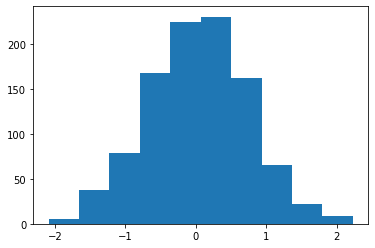

In [55]:
plt.hist(normal_randoms[:,0])